**bold**

_italic_

Regular

# Title

### HEading 3


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ClusterResultsWrongK.csv')

In [3]:
df['TrainPoints']=df['Hops']*df['Heldout']
df['copUnassignedPercentageU']=df['copNumUnassignedUnassigned']/df['Hops']*100
df['copUnassignedPercentageI']=df['copNumUnassignedInertia']/df['Hops']*100

In [4]:
df.describe()

,Unnamed: 0,ConDrop,Error,Heldout,Hops,Trial,copInerInertia,copInerIter,copInerScore,copInerTestScoreCons,...,kmInertia,kmIter,kmRuntime,kmTestScore,kmTrainScore,testcl,traincl,TrainPoints,copUnassignedPercentageU,copUnassignedPercentageI
count,15232.0,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000,1.523200e+04,15232.000000,15232.000000,15232.000000,...,1.523200e+04,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000,15232.000000
mean,0.0,0.350000,19.500000,0.233600,144.970588,4.147059,7.074582e-02,201.473411,0.532965,0.616167,...,5.651207e-02,6.514181,0.046077,0.557315,0.521631,78.327534,347.720720,33.865129,3.502354,4.744145
std,0.0,0.229136,12.093784,0.185975,112.151033,2.891587,5.831434e-02,133.923487,0.262211,0.264894,...,4.541791e-02,4.595637,0.017845,0.263577,0.239964,146.750370,396.332299,42.991283,5.086694,5.846029
min,0.0,0.000000,0.000000,0.050000,22.000000,0.000000,1.196172e-07,1.000000,0.003043,0.000000,...,1.189909e-07,1.000000,0.022672,0.000000,0.027181,0.000000,5.000000,1.100000,0.000000,0.000000
25%,0.0,0.175000,9.000000,0.095000,75.000000,2.000000,2.176358e-02,16.000000,0.324833,0.405039,...,1.715796e-02,3.000000,0.037945,0.351641,0.337029,4.000000,98.000000,7.568000,0.000000,0.000000
50%,0.0,0.350000,19.500000,0.176000,100.000000,4.000000,5.718381e-02,300.000000,0.511555,0.636898,...,4.656221e-02,5.000000,0.043393,0.568834,0.483709,23.000000,206.000000,18.392000,1.136364,2.654867
75%,0.0,0.525000,30.000000,0.314600,207.000000,7.000000,1.093703e-01,300.000000,0.744295,0.845318,...,9.067800e-02,9.000000,0.051393,0.761170,0.716999,85.000000,431.000000,44.394900,5.494505,7.526882
max,0.0,0.700000,39.000000,0.532400,486.000000,9.000000,2.736434e-01,300.000000,1.000000,1.000000,...,1.966805e-01,41.000000,1.700342,1.000000,1.000000,1259.000000,2599.000000,258.746400,32.467532,38.961039


In [5]:
sns.set() #apply default seaborn theme, scaling and color palette

(0.2, 1)

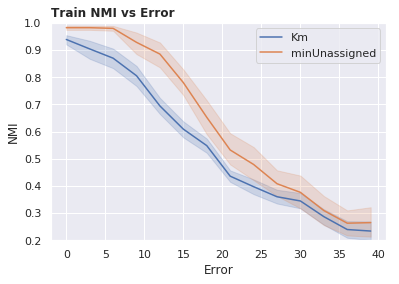

In [6]:
# Plot to show NMI of standard kmeans, constrained with forced assignement, 
# constrained with best inertia and constrained with best # assigned
plt.figure()
plt.title('Train NMI vs Error',loc='left', fontweight='bold')
constantHeldoutConstraints={'ConDrop':[0],'k':[5]}
data=df[df[list(constantHeldoutConstraints)].isin(constantHeldoutConstraints).all(axis=1)]
sns.lineplot(x='Error', y=('kmTrainScore'),data=data,label='Km' )
#sns.lineplot(x='Error', y=('copTrainScore'),data=data,label='CopForce')
#sns.lineplot(x='Error', y=('copInerScore'),data=data ,label='minInertia')
sns.lineplot(x='Error', y=('copUnassScore'),data=data,label='minUnassigned')

#ax2=plt.twinx()
#sns.lineplot(x='Error', y=('copNumUnassignedUnassigned'),data=data,label='NumDropUnassigned', ax=ax2,ci=None)
#sns.lineplot(x='Error', y=('copNumUnassignedInertia'),data=data ,label='NumDropInertia', ax=ax2,ci=None)

plt.ylabel('NMI')
plt.ylim((.2,1))

(0.2, 1)

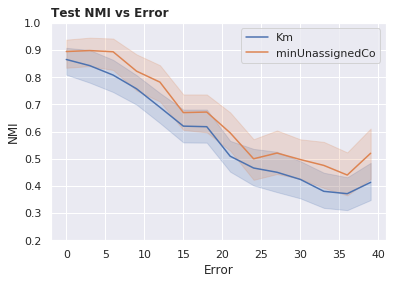

In [7]:
# Plot to show the same performance over the left out set
plt.figure()
plt.title('Test NMI vs Error',loc='left', fontweight='bold')
sns.lineplot(x='Error', y=('kmTestScore'),data=data ,label='Km' )
#sns.lineplot(x='Error', y=('copInerTestScoreCons'),data=data ,label='minInertiaCo')
sns.lineplot(x='Error', y=('copUnassTestScoreCons'),data=data ,label='minUnassignedCo')

plt.ylabel('NMI')
plt.ylim((.2,1))

(0.1, 0.55)

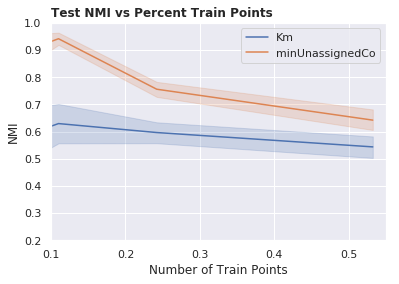

In [8]:
#Plot to show performance of varied number of left out points
plt.figure()

plt.title('Test NMI vs Percent Train Points',loc='left', fontweight='bold')
constantConstraints={'ConDrop':[0],'k':[5]}
#data=df[df[list(constantConstraints)].isin(constantConstraints).all(axis=1)]
#data = df[df["ConDrop"].isin([0, 0.1, 0.2])]
data = df[(df["ConDrop"]==0) & (df["Hops"] <60 )]
sns.lineplot(x=('Heldout'), y=('kmTestScore'),data=data ,label='Km' )
#sns.lineplot(x='Heldout', y=('copTestScoreNone'),data=data ,label='CopForceNo')
#sns.lineplot(x='Heldout', y=('copTestScoreCons'),data=data ,label='CopForceCo')
#sns.lineplot(x=('Heldout'), y=('copInerTestScoreCons'),data=data ,label='minInertiaCo')
#sns.lineplot(x='Heldout', y=('copUnassTestScoreNone'),data=data ,label='minUnassignedNo')
sns.lineplot(x=('Heldout'), y=('copUnassTestScoreCons'),data=data ,label='minUnassignedCo')
plt.xlabel('Number of Train Points')
plt.ylabel('NMI')
plt.ylim((.2,1))
plt.xlim((.1,.55))



(0.2, 1)

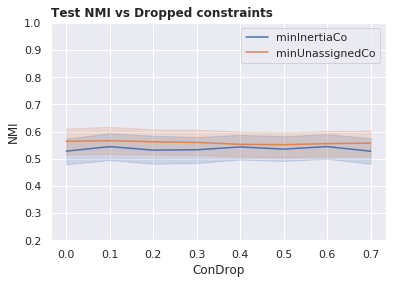

In [9]:
# Plot to show performance as a function of number of constraints
# This plot will work with the newly generated dataset
plt.figure()
plt.title('Test NMI vs Dropped constraints',loc='left', fontweight='bold') 
constantHeldout={'Heldout':[.5324],'k':[5]}
data=df[df[list(constantHeldout)].isin(constantHeldout).all(axis=1)]
#sns.lineplot(x='ConDrop', y=('copTestScoreNone'),data=data ,label='CopForceNo')
#sns.lineplot(x='ConDrop', y=('copTestScoreCons'),data=data ,label='CopForceCo')
#sns.lineplot(x='ConDrop', y=('copInerTestScoreNone'),data=data ,label='minInertiaNo')
sns.lineplot(x='ConDrop', y=('copInerTestScoreCons'),data=data ,label='minInertiaCo')
#sns.lineplot(x='ConDrop', y=('copUnassTestScoreNone'),data=data ,label='minUnassignedNo')
sns.lineplot(x='ConDrop', y=('copUnassTestScoreCons'),data=data ,label='minUnassignedCo')
plt.ylabel('NMI')
plt.ylim((.2,1))

Text(0,0.5,'Inertia')

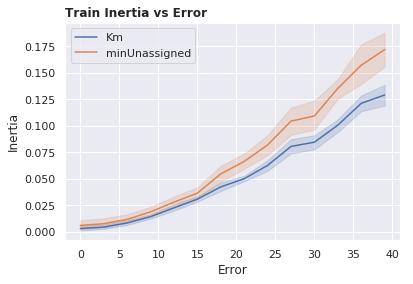

In [10]:
# Plot to show NMI of standard kmeans, constrained with forced assignement, 
# constrained with best inertia and constrained with best # assigned
plt.figure()
plt.title('Train Inertia vs Error',loc='left', fontweight='bold')
constantHeldoutConstraints={'Heldout':[.5324],'ConDrop':[0],'k':[5]}
data=df[df[list(constantHeldoutConstraints)].isin(constantHeldoutConstraints).all(axis=1)]
sns.lineplot(x='Error', y=('kmInertia'),data=data,label='Km' )
#sns.lineplot(x='Error', y=('copInertia'),data=data,label='CopForce')
#sns.lineplot(x='Error', y=('copInerInertia'),data=data ,label='minInertia')
sns.lineplot(x='Error', y=('copUnassInertia'),data=data,label='minUnassigned')
plt.ylabel('Inertia')

**bold**

_italic_

Regular

# Title

### HEading 3


Text(0,0.5,'Unassigned Points')

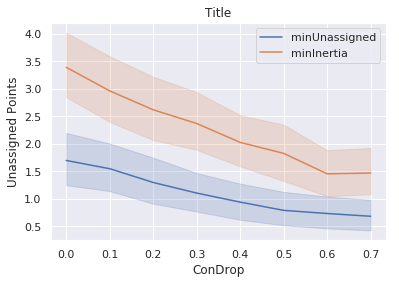

In [11]:
#Plot to show number of left out points as a function of number of constraints
plt.figure()
plt.title('Title')
constantHeldoutConstraints={'Heldout':[.5324],'k':[5]}
data=df[df[list(constantHeldoutConstraints)].isin(constantHeldoutConstraints).all(axis=1)]
sns.lineplot(x='ConDrop', y=('copNumUnassignedUnassigned'),data=data,label='minUnassigned')
sns.lineplot(x='ConDrop', y=('copNumUnassignedInertia'),data=data ,label='minInertia')
plt.ylabel('Unassigned Points')


Text(0,0.5,'Unassigned Points')

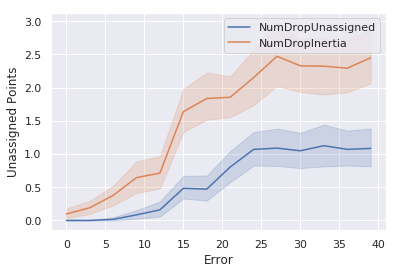

In [12]:
#Plot to show number of left out points as a function of number of constraints
plt.figure()
constantHeldoutConstraints={'Heldout':[.5324],'k':[5]}
data=df[df[list(constantHeldoutConstraints)].isin(constantHeldoutConstraints).all(axis=1)]
sns.lineplot(x='Error', y=('copUnassignedPercentageU'),data=data,label='NumDropUnassigned')
sns.lineplot(x='Error', y=('copUnassignedPercentageI'),data=data ,label='NumDropInertia')
plt.ylabel('Unassigned Points')

Text(0,0.5,'NMI')

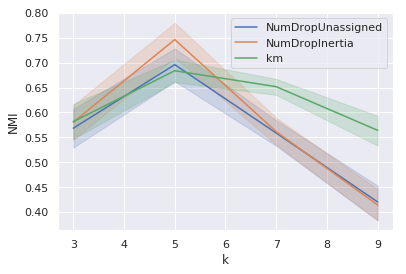

In [13]:
#Plot to show performance over k clusters
plt.figure
constantHeldoutError={'Heldout':[.5324],'Error':[12]}
data=df[df[list(constantHeldoutError)].isin(constantHeldoutError).all(axis=1)]
sns.lineplot(x='k', y=('copInerTestScoreCons'),data=data,label='NumDropUnassigned')
sns.lineplot(x='k', y=('copUnassTestScoreCons'),data=data ,label='NumDropInertia')
sns.lineplot(x='k', y=('kmTestScore'),data=data ,label='km')
plt.ylabel('NMI')